In [2]:
import pandas as pd
import numpy as mp
import json
import matplotlib.pyplot as plt

file_dir = "C:/Users/Zhang/Downloads/BootCamp_finalproject/"

metadata0 = pd.read_csv(f'{file_dir}movies_metadata.csv', low_memory = False)
rawdata0 = pd.read_csv(f'{file_dir}raw_moviedata.csv', low_memory = False)

In [34]:
metadata = metadata0.drop(columns = ['adult','homepage','overview','belongs_to_collection', 'tagline', 'status', 
                         'poster_path', 'original_title', 'spoken_languages', 'imdb_id', 'id',
                         'production_companies', 'video', 'vote_count','production_countries'])
metadata

,budget,genres,original_language,popularity,release_date,revenue,runtime,title,vote_average
0,30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",en,21.946943,1995-10-30,373554033.0,81.0,Toy Story,7.7
1,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",en,17.015539,1995-12-15,262797249.0,104.0,Jumanji,6.9
2,0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",en,11.7129,1995-12-22,0.0,101.0,Grumpier Old Men,6.5
3,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",en,3.859495,1995-12-22,81452156.0,127.0,Waiting to Exhale,6.1
4,0,"[{'id': 35, 'name': 'Comedy'}]",en,8.387519,1995-02-10,76578911.0,106.0,Father of the Bride Part II,5.7
...,...,...,...,...,...,...,...,...,...
45461,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...",fa,0.072051,NaN,0.0,90.0,Subdue,4.0
45462,0,"[{'id': 18, 'name': 'Drama'}]",tl,0.178241,2011-11-17,0.0,360.0,Century of Birthing,9.0
45463,0,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",en,0.903007,2003-08-01,0.0,90.0,Betrayal,3.8
45464,0,[],en,0.003503,1917-10-21,0.0,87.0,Satan Triumphant,0.0


In [35]:
rawdata = rawdata0.drop(columns = ['video_id', 'cvt_per_day','weighted_categorical_position','import_id', 
                         'metacritic_score','mpaa','star_category','weighted_horizontal_poition',
                        'awards', 'imdb_votes'])

rawdata.head

<bound method NDFrame.head of       release_year                                         genres    budget  \
0             2013                          Action,Thriller,Drama  15000000   
1             2013                          Comedy,Crime,Thriller  15000000   
2             2012                                    Crime,Drama  26000000   
3             2008  Thriller,Drama,War,Documentary,Mystery,Action  15000000   
4             2013             Crime,Thriller,Mystery,Documentary  27220000   
...            ...                                            ...       ...   
4221          2010                                   Comedy,Drama         0   
4222          2013                                          Music         0   
4223          2008                                         Comedy         0   
4224          2003                                    Documentary    100000   
4225          2003                                  Drama,Romance         0   

      boxoffice  imdb

1. the scatter plot between rating scores and boxoffice. 

Text(0, 0.5, 'boxoffice')

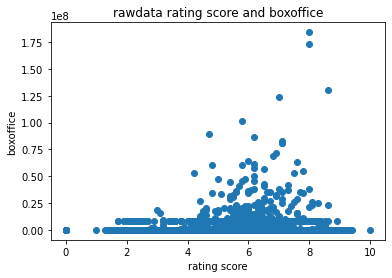

In [5]:
raw_rating_boxoffice = plt.scatter(rawdata.imdb_rating, rawdata.boxoffice)
plt.title('rawdata rating score and boxoffice')
plt.xlabel('rating score')
plt.ylabel('boxoffice')

Text(0, 0.5, 'movies runtime(minutes)')

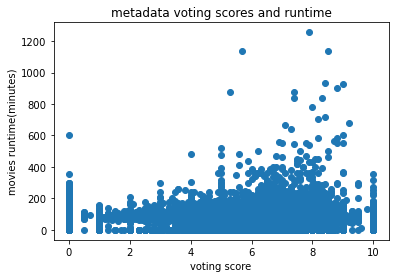

In [6]:
meta_voting_runtime = plt.scatter(metadata.vote_average, metadata.runtime)
plt.title('metadata voting scores and runtime')
plt.xlabel('voting score')
plt.ylabel('movies runtime(minutes)')

Text(0, 0.5, 'durations in minutes')

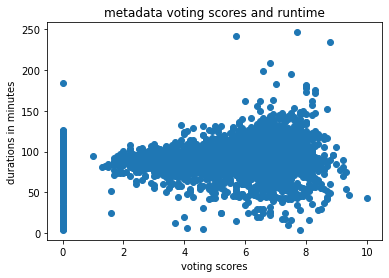

In [7]:
raw_rating_runtime = plt.scatter(rawdata.imdb_rating, rawdata.duration_in_mins)
plt.title('metadata voting scores and runtime')
plt.xlabel('voting scores')
plt.ylabel('durations in minutes')

Text(0, 0.5, 'revenue/Billion')

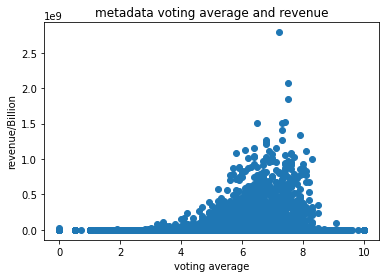

In [8]:
meta_popularity_ratings = plt.scatter(metadata.vote_average, metadata.revenue)
plt.title('metadata voting average and revenue')
plt.xlabel('voting average')
plt.ylabel('revenue/Billion')

In [11]:
metadata['vote_average']

0        7.7
1        6.9
2        6.5
3        6.1
4        5.7
        ... 
45461    4.0
45462    9.0
45463    3.8
45464    0.0
45465    0.0
Name: vote_average, Length: 45466, dtype: float64

In [10]:
rawdata['imdb_rating']

0       6.5
1       6.5
2       7.3
3       7.6
4       6.4
       ... 
4221    7.8
4222    0.0
4223    7.1
4224    6.0
4225    7.6
Name: imdb_rating, Length: 4226, dtype: float64

In [21]:
agg_data = metadata.merge(rawdata, how = 'inner', left_on = 'vote_average', right_on = 'imdb_rating')

In [14]:
agg_data.head(10)

,budget_x,genres_x,original_language,popularity,release_date,revenue,runtime,title,vote_average,release_year,genres_y,budget_y,boxoffice,imdb_rating,duration_in_mins
0,0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",en,11.7129,1995-12-22,0.0,101.0,Grumpier Old Men,6.5,2013,"Action,Thriller,Drama",15000000,42930462,6.5,112.301017
1,0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",en,11.7129,1995-12-22,0.0,101.0,Grumpier Old Men,6.5,2013,"Comedy,Crime,Thriller",15000000,3301046,6.5,94.983250
2,0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",en,11.7129,1995-12-22,0.0,101.0,Grumpier Old Men,6.5,2010,"Action,Horror,Thriller",20000000,29975979,6.5,97.815783
3,0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",en,11.7129,1995-12-22,0.0,101.0,Grumpier Old Men,6.5,2015,Thriller,50000000,1206135,6.5,137.181650
4,0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",en,11.7129,1995-12-22,0.0,101.0,Grumpier Old Men,6.5,2014,Drama,1500000,8551228,6.5,101.473267
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2089528,0,"[{'id': 35, 'name': 'Comedy'}]",en,0.032701,1990-02-01,0.0,74.0,Babnik,1.0,2014,Comedy,0,0,1.0,94.697017
2089529,0,"[{'id': 18, 'name': 'Drama'}]",ru,0.001393,1983-11-21,0.0,98.0,Postscript,1.0,2014,Comedy,0,0,1.0,94.697017
2089530,0,"[{'id': 12, 'name': 'Adventure'}, {'id': 18, '...",ru,0.061158,2004-08-26,0.0,101.0,A Wolf from Vesyegonsk,1.0,2014,Comedy,0,0,1.0,94.697017
2089531,0,[],ru,0.038832,2007-11-27,0.0,124.0,Two in One,1.0,2014,Comedy,0,0,1.0,94.697017


In [33]:
data = agg_data.groupby(['title']).mean().drop(columns =['release_year']).drop(columns = ['revenue'])

In [32]:
data.head(30)

,runtime,vote_average,budget_y,boxoffice,imdb_rating,duration_in_mins
title,,,,,,
#chicagoGirl,74.0,7.0,2.817488e+06,4.264636e+06,7.0,96.912048
"$1,000 on the Black",104.0,6.0,4.325648e+06,3.180871e+06,6.0,93.070882
"$100,000 for Ringo",98.0,5.0,1.175443e+06,2.018162e+06,5.0,88.285863
$5 a Day,98.0,6.0,4.325648e+06,3.180871e+06,6.0,93.070882
$9.99,78.0,6.0,4.325648e+06,3.180871e+06,6.0,93.070882
$ellebrity,89.0,5.5,2.930139e+06,2.276148e+06,5.5,90.323567
'49-'17,61.0,0.0,2.681005e+04,0.000000e+00,0.0,63.852695
'Gator Bait,88.0,6.5,4.721099e+06,3.929941e+06,6.5,95.429600
'Tis the Season for Love,84.0,6.0,4.325648e+06,3.180871e+06,6.0,93.070882
